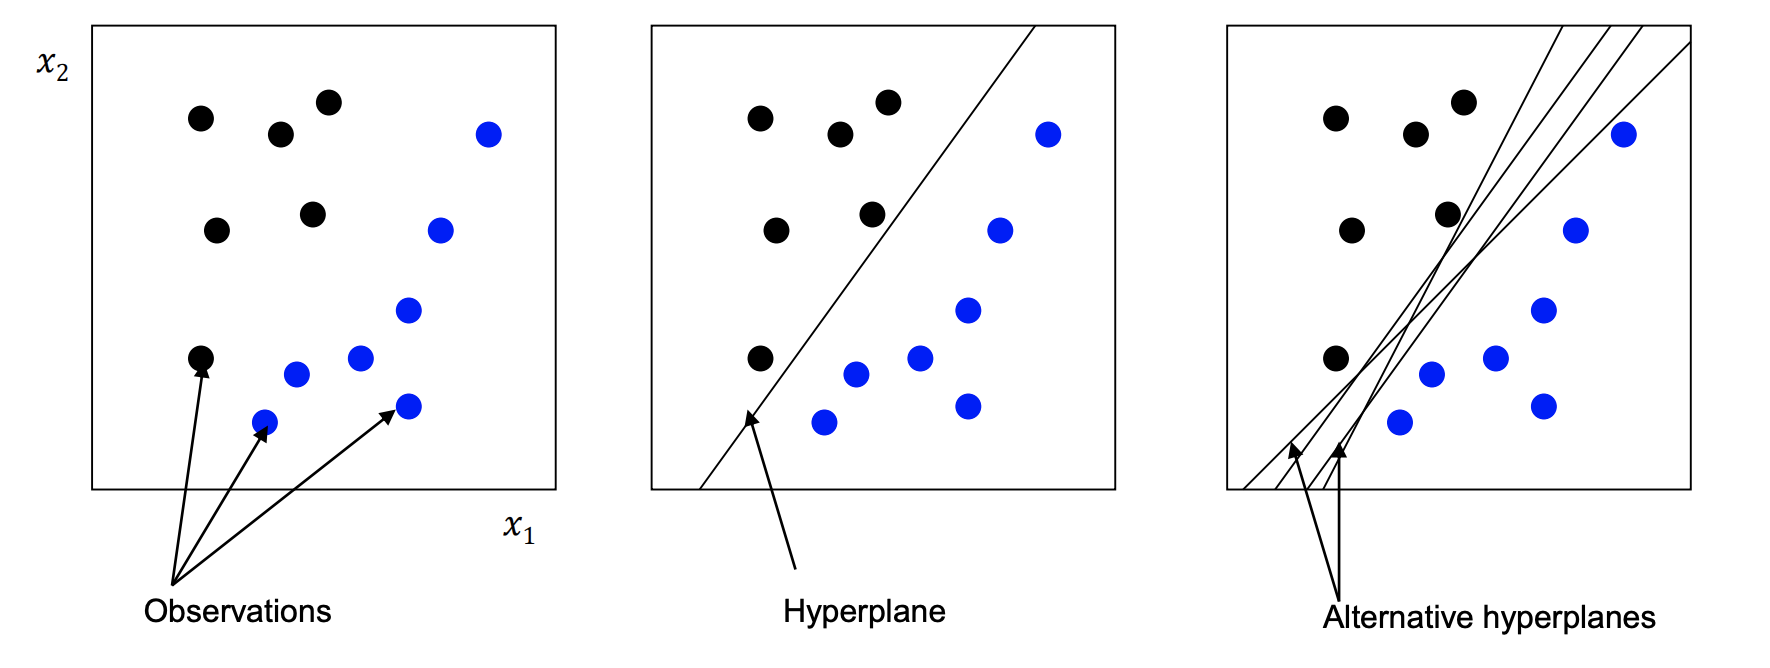

# Support Vector Machines

#### Educational objectives
- Explain the Support Vector Machine method in some detail.
- Implement SVM successfully on an example
- Examine the effect of varying parameters

### Hyperplane classifiers
- Powerful and flexible class of supervised algorithms for both classification and regression.

The objective of the SVM is to maximize a margin while constraining that the samples are classified correctly. Mathematically,

$ b + w_Tx^{(i)} \geq 1$  if $y ^{(i)} = 1$

$ b + w_Tx^{(i)} \leq -1$  if $y ^{(i)} = -1$

For $i= 1,\ldots ,N$

The $w_T$ term is called the **weight vector** and contains the weights that are used in the classification.

The $b$ term is called the **bias** and functions as an offset term. If there were no bias term, the hyperplane would always go through the origin which would not be very generalizable! 


These equations basically say that all negative samples should fall on on the left side of the negative hyperplane, whereas all the positive samples should fall on the right of the positive hyperplane. This can also be written in one line as follows:

$y ^{(i)} (b + w_Tx^{(i)} )\geq 1$  for each $i$

In [14]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#!pip install hide_code==0.2.0

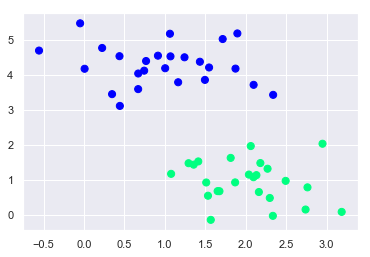

In [17]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

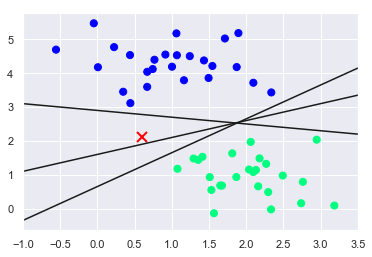

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

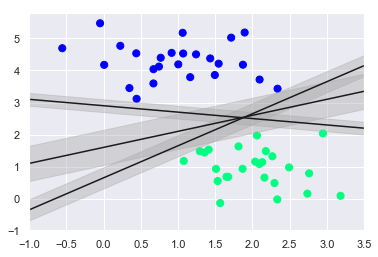

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

- **The best separating hyperplane is defined as the hyperplane that contains the ‘widest’ margin between support vectors.**

In [20]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y);

In [21]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

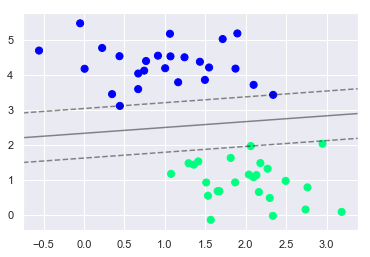

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

#### Obtaining Support Vectors

In [23]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

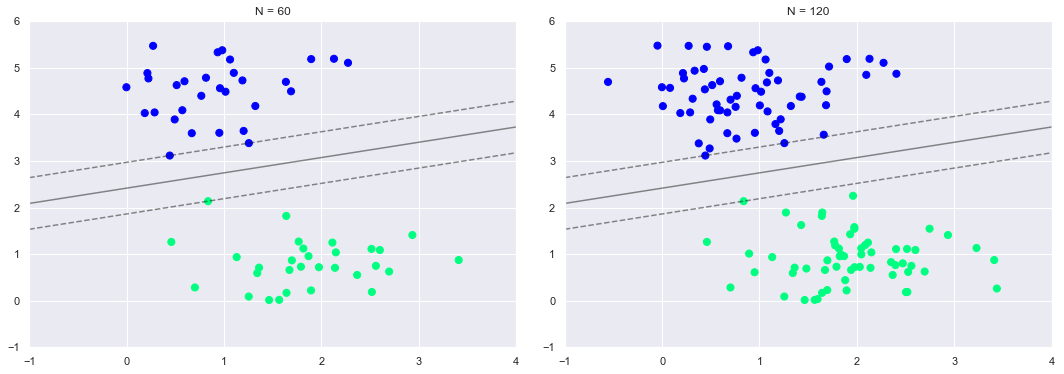

In [24]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**The insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.**

In [25]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200), value=10), Output()), _dom_classes…

## Linearly Non-Separable Data

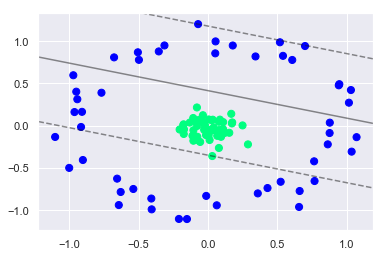

In [26]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

In [27]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=120, azim=52, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 90], azip=(-360, 360),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(0, 90), value=0), IntSlider(value=52, description=…

In [29]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y);

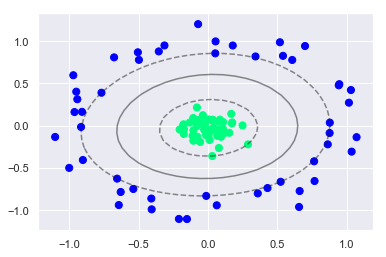

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Parameters Impacting Model Performance “kernel”, “gamma” and “C”.

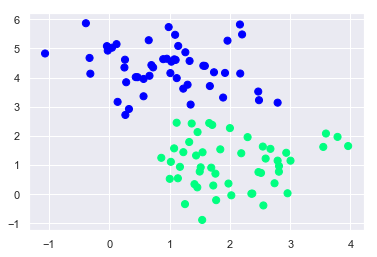

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

**C** - controls the hardening of the margin (regularization parameter). 
  - C penalty factor on misclassifications
  - Very large C, the margin is hard, and points cannot lie in it. 
  - Smaller C, the margin is softer, and can grow to encompass some points.


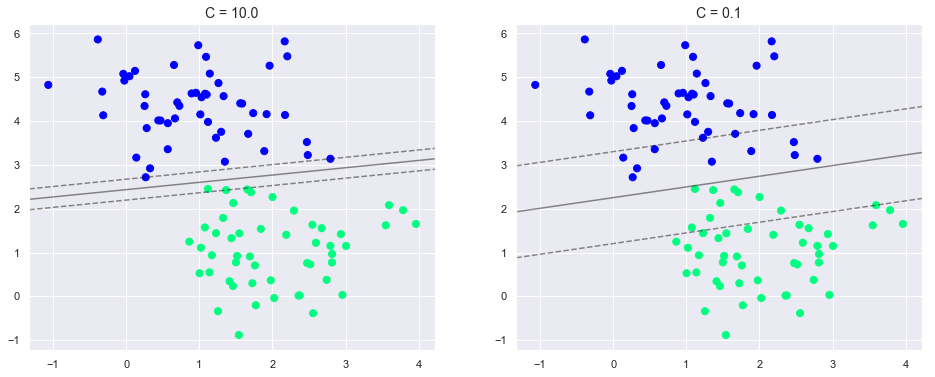

In [32]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Different Kernels
- RBF

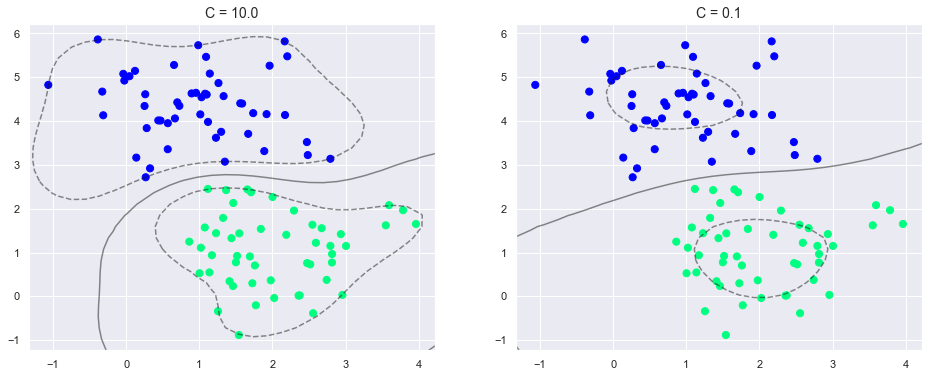

In [33]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

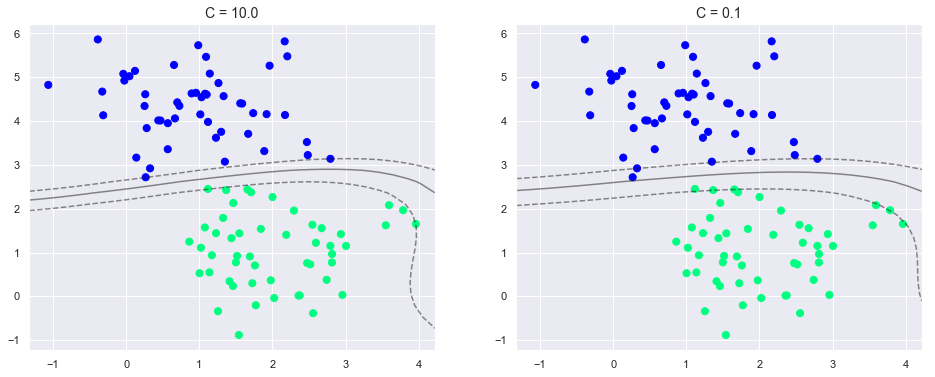

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='poly', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### ${\gamma}$
- Tunning parameter
- Can think of it as $\frac{1}{\sigma}$ for rbf kernel
- Large ${\gamma}$  small standard deviation (more wiggliy decision boundaries)
- Small ${\gamma}$ large standard deviation (decision boundaries are smoother)

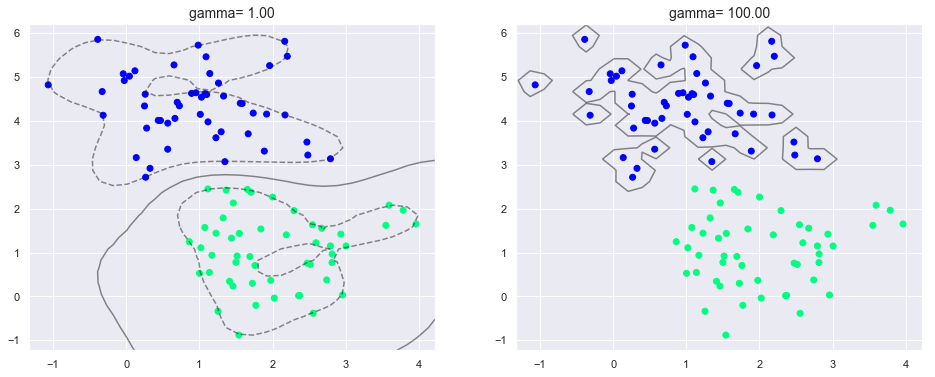

In [35]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, gamma in zip(ax, [1.0,100.0]):
    model = SVC(kernel='rbf', C=10000, gamma= gamma ).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                 lw=2, facecolors='none');
    axi.set_title('gamma= {1:.2f}'.format(C,gamma), size=14)

### We should always look at the cross validation score find an effective combination of the parameters to avoid over-fitting.

### Pros and Cons associated with SVM
**Pros:**
- It works really well with clear margin of separation
- It is effective in high dimensional spaces.
- It is effective in cases where number of dimensions is greater than the number of samples.
- It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.


**Cons:**
- It doesn’t perform well, when we have large data set because the required training time is higher
- It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
- SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

### Breast Cancer Support Vector Classifier

In [36]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

In [37]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)

In [38]:
predictor=bc.drop(columns=['class'])
predictor.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [39]:
scaler = StandardScaler()
predictor= scaler.fit_transform(predictor)

In [40]:
# Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.2,random_state=9) 

In [75]:
# fit our model
from sklearn.svm import SVC  
svclassifier = SVC(C=.04,kernel='linear', class_weight='balanced')  
svclassifier.fit(X_train, y_train)

SVC(C=0.04, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
y_pred = svclassifier.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print(f"The accuracy score is {accuracy_score(y_test, y_pred)}")

The accuracy score is 0.956140350877193


In [78]:
print("f1 Score:",f1_score(y_test, y_pred))

f1 Score: 0.9484536082474226


## In Class Work
- Use grid search to improve on model. 

# Summary
- SVM is very effective
- However, it is not highly interpretable
- Optimization is hard to understand (convex quadratic program)
- Performs really well on high dimensional dataset with low amount of observations

### Reference

1. https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
2. http://faculty.marshall.usc.edu/gareth-james/ISL/